# "Edges and Corners"

# Recap

This is the lab on finding Edges and Corners for Classical Image Segmention in CE6003. You should complete the tasks in this lab as part of the Edges section of the lesson.

Please remember this lab must be completed before taking the quiz at the end of this lesson.


First, if we haven't already done so, we need to clone the various images and resources needed to run these labs into our workspace.

In [ ]:
#!git clone https://github.com/EmdaloTechnologies/CE6003.git

# Introduction

In this lab you will complete your fouth image segmentation project where you will use the Canny algorithm to identify the edges in a martini glass. You will them use dilation, erosing, and contour handling to segment the martini glass from the background of the image.

You will also identify the corners of the image.

At the end of the lab we'll review the work we've done and assess what types of images and projects these approaches are effective for.



# Goal

In this lab, you will: 
* learn about one introductary 'edge detection' image segmentation techique - 'Canny';
* again see how deblurring, thresholding, dilation, opening, are needed *particularly* with edge detection where closing contours is a common issue;
* use those techniques to segment an image with straight edges - the martini glass;
* use the Harris algorithm to detect corners in the martini glass image.

# Background

Image segmentation is the process of partitioning a digital image into multiple segments to make the image easier to analyze.  Often we are looking to locate objects and boundaries in the original image.  Another way of looking at it is image segmentation's goal is to assign a label to every pixel in an image such that pixels with the same label share certain characteristics.  Like many elements of computer vision, I find an example is often more useful than precise text.

For example, these images show a typical road scene on the left and a segmented version of the image on the right.

<p float="center">
  <img src="https://github.com/EmdaloTechnologies/CE6003/blob/master/images/lab2/bg-road.png?raw=1" width="450" />
</p>


# Edge Detection

In this technique, we will see how to use the Canny algorithm along with some dilation and erosion to segment our martini glass image.



As usual, first you must load the libraries that you''ll need for this lab.

In [1]:
# All you need for this lab is OpenCV, numpy and pyplot

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Now, load the martini glass and experiment with the edges provided by the Canny algorithm.

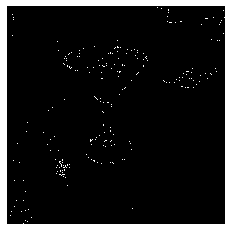

In [21]:
# Load the martini image as grayscale.
#img = cv2.imread("/content/CE6003/images/lab2/martini.png")
img = cv2.imread("./images/lab2/martini.png")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Run Canny's edge detection over the martini
# glass with TODO as parameters.
edges = cv2.Canny(gray, 100, 200)
plt.grid(False)
plt.axis('off')
plt.imshow(edges, cmap='gray')


You should be seeing an image similar to this one.

<img src="https://github.com/EmdaloTechnologies/CE6003/blob/master/images/lab2/martini_canny.png?raw=1" alt="Martini glass" align="left" style="width: 300px;"/>


One of the issues with edge based detections is that they tend to be non-contiguous.  So, we have some work to do to join the dots (literally).

There's a variety of approaches you can use. I'd like you to solve this one on your own!

If you want to follow a trodden path instead of exploring on your own, I do have
a hint for you.  There's a simple operation that we've used several times in these
labs already to go from an image like the one above to an image like the one below.

<img src="https://github.com/EmdaloTechnologies/CE6003/blob/master/images/lab2/martini_canny_dilated6.png?raw=1" alt="Martini glass Dilated" align="left" style="width: 300px;"/>




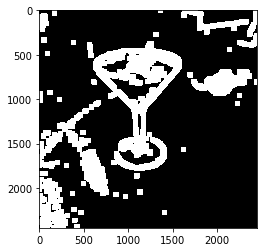

In [22]:
# YOUR CODE HERE
# You should have everything you need if you consult the other labs.

# HINT: I dilated the image 6 times with the kernel below and then used findContours and drawContours as the basis of the mask
# The key is getting a good contour line.  Lots of techniques will work here!
kernel = np.ones((10,10),np.uint8)
dilation = cv2.dilate(edges,kernel,iterations = 6)

plt.imshow(dilation, cmap='gray')
# Hint: You'll find answers at the bottom of this lab. 

After that it should just be a case of extracting the largest contour in the scene and creating a mask based on that.  If you can''t recall how, there is code to do just that in one of the earlier labs

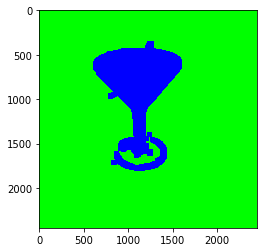

In [23]:
# Find the contours - just external contours to keep post-processing simple
#_, contours, _ = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours, _ = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the candidates by size, keep the largest one
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:1]

# Create two related images - one contains the shape of the martini
# glass with black (0's) in the remainder, the other contains
# black where the martini glass is and a colour everywhere else
h, w, num_c = img.shape
segmask = np.zeros((h, w, num_c), np.uint8)
stencil = np.zeros((h, w, num_c), np.uint8)

for c in contours:
    cv2.drawContours(segmask, [c], 0, (255, 0, 0), -1)
    cv2.drawContours(stencil, [c], 0, (255, 0, 0), -1)

# Rearrange the colors in the stencil.  Anything that's black
# replace with green.
stencil[np.where((stencil==[0,0,0]).all(axis=2))] = [0, 255, 0]
# Now its safe to convert the blue to black
stencil[np.where((stencil==[255,0,0]).all(axis=2))] = [0, 0, 0]

# Add the two images (or or them if you prefer)
mask = cv2.bitwise_or(stencil, segmask)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))

output = cv2.bitwise_or(mask, img)
# plt.imshow(output)

Your goal is to produce an image similar to this reference image.

<img src="https://github.com/EmdaloTechnologies/CE6003/blob/master/images/lab2/martini_canny_segmented.png?raw=1" alt="Martini glass Segmented" align="left" style="width: 300px;"/>


# Corners

Our last mini-lab is just to introduce you to another key feature that is used in image segmentation - corners.  We'll have a look at the Harris corner detection algorithm now.

Please complete this lab in conjunction with the 'Edges and Corners' lesson.

In [ ]:
# We've already loaded the necessary libraries, so nothing to do here.

In [24]:
# You already have a grayscale image - convert it to float32's
gray = np.float32(gray)

corners = cv2.cornerHarris(gray, 2, 3, 0.04)
print(corners)

[[-1.9099545e+02 -1.9099545e+02  4.8267246e+03 ...  1.7345313e+00
   3.0360001e+01  4.8634220e+01]
 [-1.9099545e+02 -1.9099545e+02  4.8267246e+03 ...  1.7345313e+00
   3.0360001e+01  4.8634220e+01]
 [-2.2551416e+02 -2.2551416e+02  2.4360902e+04 ...  3.5946289e+01
   1.4093750e+01 -1.4394960e+01]
 ...
 [-1.0518555e+01 -1.0518555e+01  2.9520508e+01 ...  3.9546875e+01
   8.5762177e+00  9.8670349e+00]
 [ 4.7699219e-01  4.7699219e-01 -2.7787495e+00 ...  2.7448218e+02
   3.1337985e+02  1.4223708e+02]
 [ 8.0000000e+00  8.0000000e+00  5.5471252e+01 ... -1.0302498e+01
   7.2652191e+01  5.9726719e+01]]


Now, put your corners onto the original image

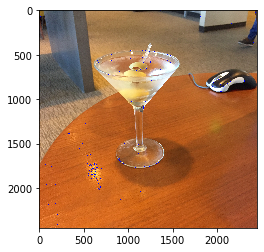

In [39]:
img = cv2.imread("./images/lab2/martini.png")
# YOUR CODE HERE
# Adjust this threshold until you see an image similar to the reference image below
# Exercise: set the variable threshold to a suitalbe number
threshold = 0.002
# Threshold may vary
# END YOUR CODE HERE

img[corners > (threshold * corners.max())]=[255, 0, 0]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


Your target is to generate an image similar to this reference image.

<img src="https://github.com/EmdaloTechnologies/CE6003/blob/master/images/lab2/martini_harris.png?raw=1" alt="Martini Harris" align="left" style="width: 300px;"/>



# Conclusion

So, that completes the fourth and final lab in this lesson.

You''ve learned about edges and corners
You''ve learned how to use the Canny algorithm to segment an image that has edges.
You''ve learned about Harris corner detection and used it to detect corners in the martini glass image.

You've gained an insight that classical techniques involve manually tuning features like super-pixel size and trying to gauge the relative importance of colour, edges, corners, textures, etc for a particlar image or set of images.

You should now be ready for the neural network part of this course where you'll let the neural network manage these types of trade-offs itself.


**Solution for Edge Detection Missing Code**:

    kernel = np.ones((10,10),np.uint8)
    dilation = cv2.dilate(edges,kernel,iterations = 6)

    plt.imshow(dilation, cmap='gray')